In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df1 = df.copy()

In [6]:
df1 = df1.drop(columns = ['RowNumber','CustomerId','Surname'])

In [7]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [8]:
df1.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df1.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
df1['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Geography'>

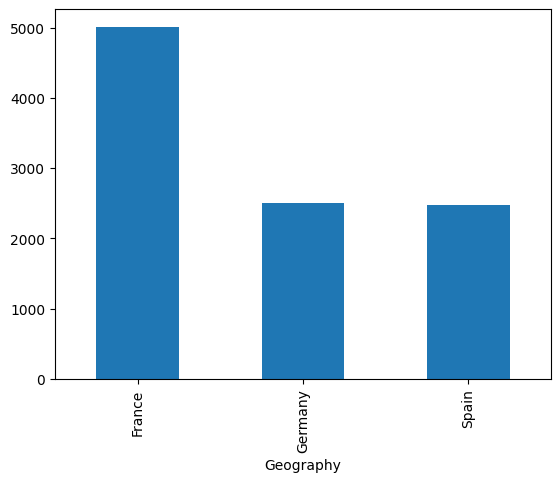

In [11]:
df1['Geography'].value_counts().plot.bar()

In [12]:
df1['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df1['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [14]:
df1['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [15]:
df1['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [16]:
df1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [17]:
df1.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [18]:
pd.crosstab(df1['Geography'] , df1['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Geography'>

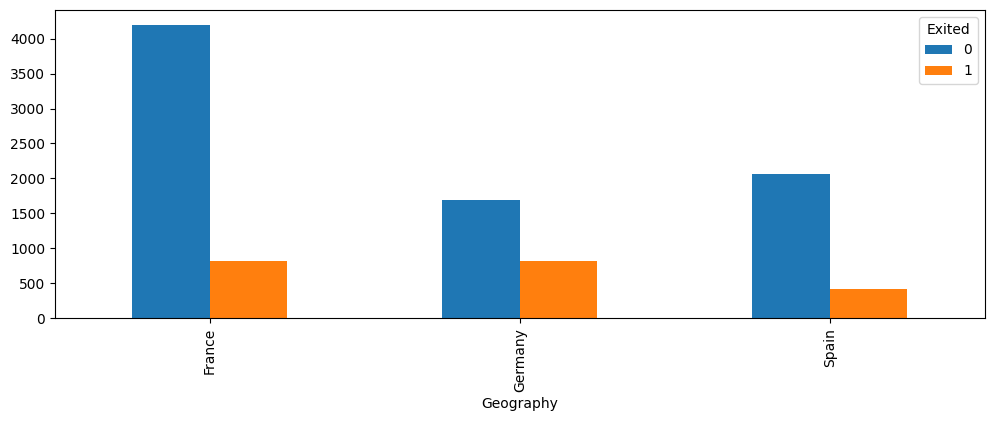

In [19]:
pd.crosstab(df1['Geography'] , df1['Exited']).plot.bar(figsize = (12,4))

<Axes: xlabel='NumOfProducts'>

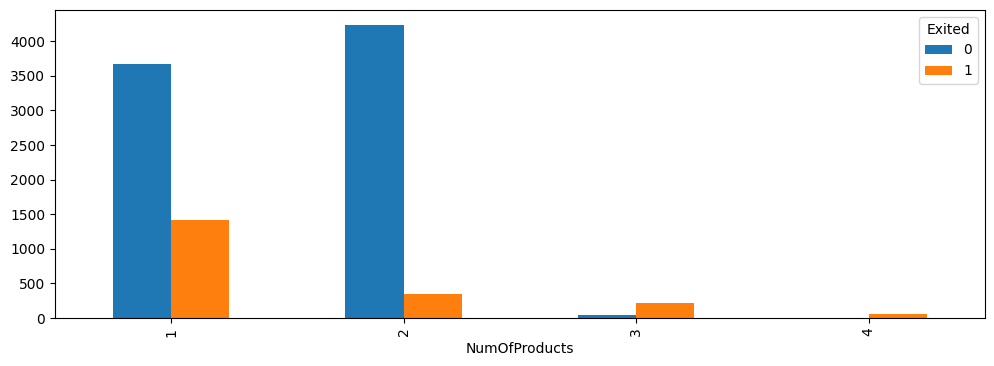

In [20]:
pd.crosstab(df1['NumOfProducts'] , df1['Exited']).plot.bar(figsize = (12,4))

<Axes: xlabel='Gender'>

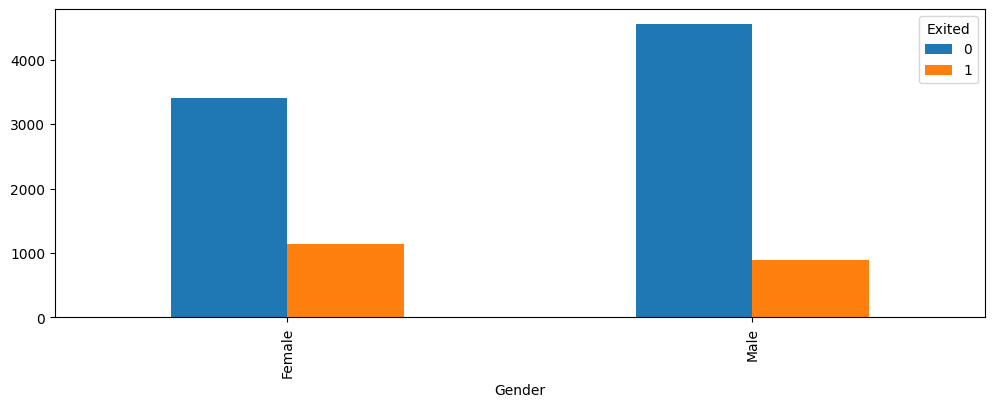

In [21]:
pd.crosstab(df1['Gender'] , df1['Exited']).plot.bar(figsize = (12,4))

<Axes: xlabel='HasCrCard'>

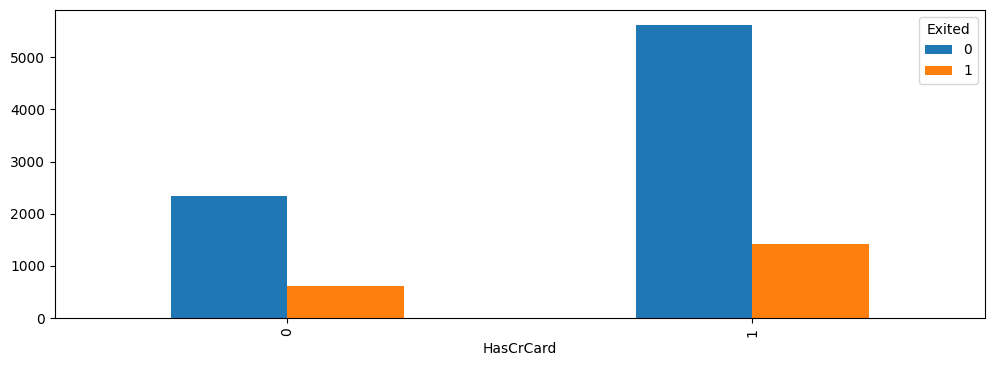

In [22]:
pd.crosstab(df1['HasCrCard'] , df1['Exited']).plot.bar(figsize = (12,4))

<Axes: xlabel='IsActiveMember'>

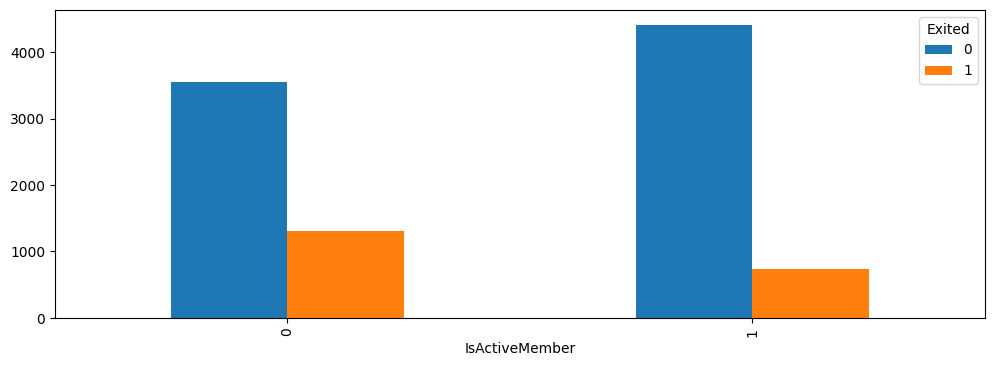

In [23]:
pd.crosstab(df1['IsActiveMember'] , df1['Exited']).plot.bar(figsize = (12,4))

In [24]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df1[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].corr()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000


In [26]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [27]:
#Average age for exits and non-exits
df1.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [28]:
df1.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

In [29]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [112]:
X = df1.drop(columns = ['Exited'])
y = df1['Exited']

In [31]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [32]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [33]:
print(X['Gender'].unique())
print(X['Geography'].unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


In [114]:
#Label encoding
X['Gender'] = X['Gender'].map({'Female':0, 'Male':1})

In [115]:
#One hot encoding
X = pd.get_dummies(X, dtype=int)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [116]:
#Split the data => train & test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.75)

In [37]:
#Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain)

xtrainScaled = scaler.transform(xtrain)
xtestScaled = scaler.transform(xtest)

In [38]:
#Build a predictive model
from sklearn.linear_model import LogisticRegression
modelA = LogisticRegression(max_iter=1000)
modelA.fit(xtrainScaled,ytrain)

LogisticRegression(max_iter=1000)

In [39]:
#Evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
ytrainP = modelA.predict(xtrainScaled)
ytestP = modelA.predict(xtestScaled)

In [41]:
(ytrain == ytrainP).sum()/len(xtrain)

np.float64(0.8092)

In [42]:
print("Accuracy score on training data", accuracy_score(ytrain,ytrainP))
print("Accuracy score on test data", accuracy_score(ytest,ytestP))

Accuracy score on training data 0.8092
Accuracy score on test data 0.8208


In [43]:
print(confusion_matrix(ytrain,ytrainP))

[[5755  197]
 [1234  314]]


In [44]:
print(classification_report(ytrain,ytrainP))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5952
           1       0.61      0.20      0.31      1548

    accuracy                           0.81      7500
   macro avg       0.72      0.58      0.60      7500
weighted avg       0.78      0.81      0.77      7500



In [45]:
print(confusion_matrix(ytest,ytestP))

[[1953   58]
 [ 390   99]]


In [46]:
print(classification_report(ytest,ytestP))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2011
           1       0.63      0.20      0.31       489

    accuracy                           0.82      2500
   macro avg       0.73      0.59      0.60      2500
weighted avg       0.79      0.82      0.78      2500



**Undersampling**

In [47]:
X.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0


In [53]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

Xu,yu = rus.fit_resample(X,y)

In [54]:
yu.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [55]:
#Split the data => train & test sets
from sklearn.model_selection import train_test_split
xtrain_u, xtest_u, ytrain_u, ytest_u = train_test_split(Xu,yu,train_size=0.75)

#Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain_u)

xtrainScaled_u = scaler.transform(xtrain_u)
xtestScaled_u = scaler.transform(xtest_u)

#Build a predictive model
from sklearn.linear_model import LogisticRegression
modelB = LogisticRegression(max_iter=1000)
modelB.fit(xtrainScaled_u,ytrain_u)

print(classification_report(ytrain_u,modelB.predict(xtrainScaled_u)))

print()

print(classification_report(ytest_u,modelB.predict(xtestScaled_u)))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1535
           1       0.71      0.70      0.70      1520

    accuracy                           0.70      3055
   macro avg       0.70      0.70      0.70      3055
weighted avg       0.70      0.70      0.70      3055


              precision    recall  f1-score   support

           0       0.69      0.69      0.69       502
           1       0.70      0.70      0.70       517

    accuracy                           0.70      1019
   macro avg       0.70      0.70      0.70      1019
weighted avg       0.70      0.70      0.70      1019



**Oversampling**

In [57]:
#from imblearn.under_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
ros = SMOTE()

Xo,yo = ros.fit_resample(X,y)

In [58]:
yo.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [59]:
#Split the data => train & test sets
from sklearn.model_selection import train_test_split
xtrain_o, xtest_o, ytrain_o, ytest_o = train_test_split(Xo,yo,train_size=0.75)

#Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain_o)

xtrainScaled_o = scaler.transform(xtrain_o)
xtestScaled_o = scaler.transform(xtest_o)

#Build a predictive model
from sklearn.linear_model import LogisticRegression
modelC = LogisticRegression(max_iter=1000)
modelC.fit(xtrainScaled_o,ytrain_o)

print(classification_report(ytrain_o,modelC.predict(xtrainScaled_o)))

print()

print(classification_report(ytest_o,modelC.predict(xtestScaled_o)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      5965
           1       0.84      0.79      0.81      5979

    accuracy                           0.82     11944
   macro avg       0.82      0.82      0.82     11944
weighted avg       0.82      0.82      0.82     11944


              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1998
           1       0.86      0.79      0.82      1984

    accuracy                           0.83      3982
   macro avg       0.83      0.83      0.83      3982
weighted avg       0.83      0.83      0.83      3982



**Manipulating class weights**

In [66]:
#Split the data => train & test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.75)

#Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain)

xtrainScaled = scaler.transform(xtrain)
xtestScaled = scaler.transform(xtest)

#Build a predictive model
from sklearn.linear_model import LogisticRegression
modelD = LogisticRegression(max_iter=1000 , class_weight = {0:1, 1:6})
modelD.fit(xtrainScaled,ytrain)

LogisticRegression(class_weight={0: 1, 1: 6}, max_iter=1000)

In [67]:
print(classification_report(ytrain,modelD.predict(xtrainScaled)))

print()

print(classification_report(ytest,modelD.predict(xtestScaled)))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70      5977
           1       0.32      0.83      0.46      1523

    accuracy                           0.61      7500
   macro avg       0.62      0.69      0.58      7500
weighted avg       0.80      0.61      0.65      7500


              precision    recall  f1-score   support

           0       0.92      0.56      0.70      1986
           1       0.33      0.82      0.47       514

    accuracy                           0.62      2500
   macro avg       0.62      0.69      0.58      2500
weighted avg       0.80      0.62      0.65      2500



**Coefficients analysis**

In [72]:
model_coef = pd.DataFrame(modelC.coef_.reshape(-1,1))
model_coef.index = X.columns
model_coef

,0
CreditScore,-0.375952
Gender,-1.076771
Age,5.731423
Tenure,-0.429672
Balance,-0.164375
NumOfProducts,-1.759727
HasCrCard,-0.450101
IsActiveMember,-1.548924
EstimatedSalary,0.089263
Geography_France,-5.120348


<Axes: >

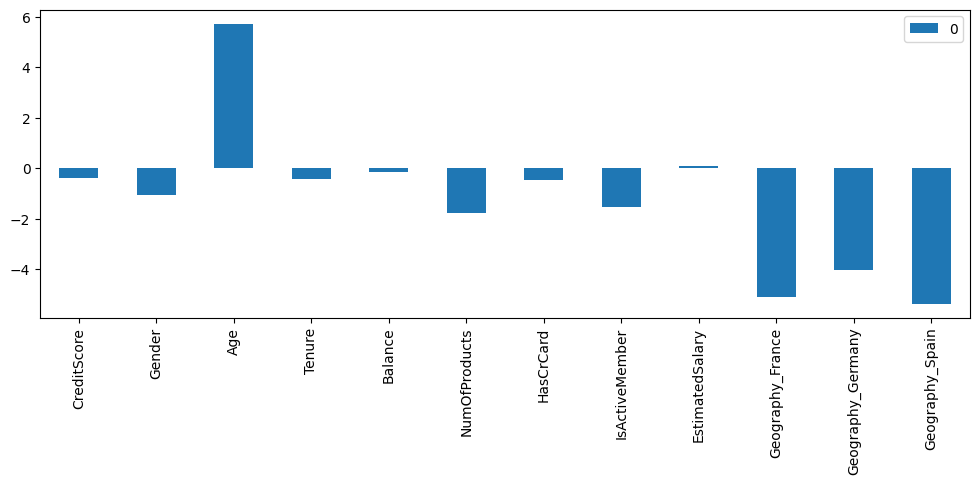

In [74]:
model_coef.plot.bar(figsize=(12,4))

**Decision Tree Classifier**

In [110]:
#df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/diabetes_data.csv')
#df.head()

In [96]:
#X = df.drop(columns = 'DiabetesRisk')
#y = df['DiabetesRisk']

In [134]:
X.shape

(10000, 12)

In [117]:
#Split the data => train & test sets
from sklearn.model_selection import train_test_split
xtrain_o, xtest_o, ytrain_o, ytest_o = train_test_split(X,y,train_size=0.75)

#Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain_o)

xtrainScaled_o = scaler.transform(xtrain_o)
xtestScaled_o = scaler.transform(xtest_o)

In [129]:
from sklearn.tree import DecisionTreeClassifier
model_treeA = DecisionTreeClassifier(criterion='entropy' , max_depth = 2)

model_treeA.fit(xtrainScaled_o, ytrain_o)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
print("Train Data Accuracy", accuracy_score(ytrain_o, model_treeA.predict(xtrainScaled_o)))

Train Data Accuracy 0.8153333333333334


In [132]:
print("Test Data Accuracy", accuracy_score(ytest_o, model_treeA.predict(xtestScaled_o)))

Test Data Accuracy 0.8328


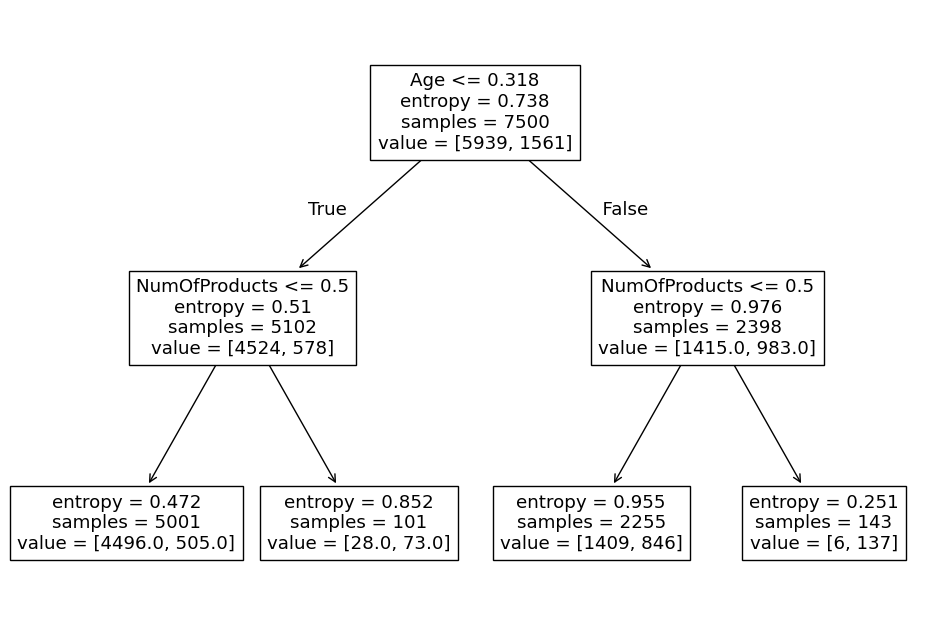

In [133]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

plot_tree(model_treeA, feature_names = X.columns)

plt.show()

**Random Forest Classifier**

In [139]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators = 100, max_depth = 3)

rmodel.fit(xtrainScaled_o, ytrain_o)

RandomForestClassifier(max_depth=3)

In [140]:
print("Train Data Accuracy", accuracy_score(ytrain_o, rmodel.predict(xtrainScaled_o)))

Train Data Accuracy 0.8150666666666667


In [141]:
print("Test Data Accuracy", accuracy_score(ytest_o, rmodel.predict(xtestScaled_o)))

Test Data Accuracy 0.8292
